# Analysis Laser diode

In [30]:
# get science plots
# https://github.com/garrettj403/SciencePlots
#import sys
#!{sys.executable} -m pip install SciencePlots

In [31]:
# get libraries
import numpy as np
import scipy as sp
import uncertainties
import matplotlib.pyplot as plt
import scienceplots

In [32]:
from uncertainties import ufloat

## settings for beautiful plots

In [33]:
plt.style.use(['science', 'notebook', 'grid', 'high-contrast'])

## Measurement of the power characteristic

### goals: 
- measurement: record the output power of the laser diode as a function of the laser current
- analysis: Determine the threshold current $I_s$ as well as the efficiency $\eta$ and the differential quantum efficiency $\eta_d$ for the temp. series and analyse the temperature behaviour

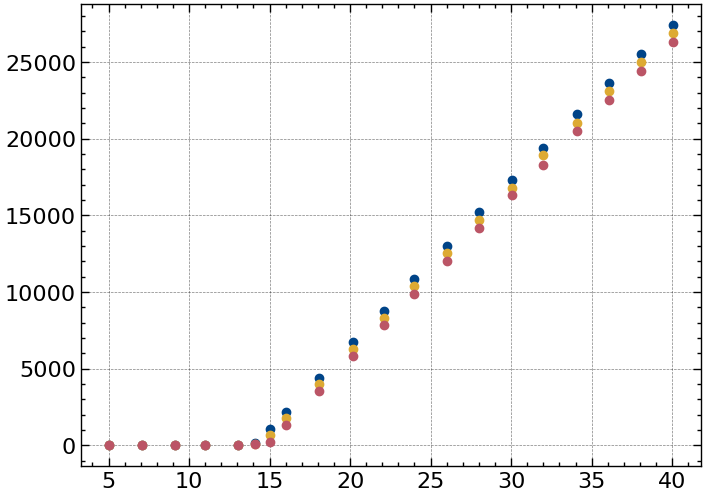

In [34]:
'''
------------------------------- Measurements done during the lab and quick plotting -------------------------------
'''
# power trend at 3 temps

#0.07(1) mA = 1.5(1)
# maybe remove additional point at 15.5
# -> removed them: 1.73e3, 1.31e3, 0.85e3

raw_data_20 = np.array([[5.04, 7.05, 9.1, 11.01, 13.02, 14.07, 15.01, 16.02, 18.06, 20.19, 22.08, 24.00, 26.02, 28.03, 30.03, 32.01, 34.06, 36.06, 38.06, 40.04],
                    [10.2, 15.2, 21.5, 29.8, 47.9, 0.121e3, 1.084e3, 2.17e3, 4.39e3, 6.71e3, 8.75e3, 10.82e3, 13.00e3, 15.2e3, 17.3e3,19.4e3, 21.60e3, 23.6e3, 25.5e3, 27.4e3]])
                    # microW
raw_data_25 = np.array([[5.04, 7.05, 9.1, 11.01, 13.02, 14.07, 15.01, 16.02, 18.06, 20.19, 22.08, 24.00, 26.02, 28.03, 30.03, 32.01, 34.06, 36.06, 38.06, 40.04],
                        [9.80, 14.7, 20.4, 28.4, 43.8, 72.9, 0.682e3, 1.79e3, 4.00e3, 6.3e3, 8.33e3, 10.39e3, 12.56e3, 14.7e3, 16.8e3, 18.9e3, 21.0e3, 23.1e3, 25.0e3, 26.9e3]])

raw_data_30 = np.array([[5.04, 7.05, 9.1, 11.01, 13.02, 14.07, 15.01, 16.02, 18.06, 20.19, 22.08, 24.00, 26.02, 28.03, 30.03, 32.01, 34.06, 36.06, 38.06, 40.04],
                        [9.5, 14.2, 20.1, 27.3, 40.1, 56.4, 0.230e3, 1.31e3, 3.53e3, 5.82e3, 7.85e3, 9.89e3, 12.03e3, 14.2e3, 16.3e3, 18.3e3, 20.5e3, 22.5e3, 24.4e3, 26.3e3]])

plt.scatter(raw_data_20[0,:], raw_data_20[1,:])
plt.scatter(raw_data_25[0,:], raw_data_25[1,:])
plt.scatter(raw_data_30[0,:], raw_data_30[1,:])


In [35]:
# post experiment analysis

# set measurements
current = np.array(raw_data_20[0,:]) # in mA; laser current for all three temp. the same
power_T20 = np.array(raw_data_20[1,:])*1e-3 # in mW;
power_T25 = np.array(raw_data_25[1,:])*1e-3 # in mW;
power_T30 = np.array(raw_data_30[1,:])*1e-3 # in mW;
power_zero = 1.5e-3 # in W; TODO: check if the background is right

# add uncertainties and subtract the background
# Power meter: https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=3328
power_zero_unc = ufloat(power_zero, power_zero*0.03)
current_unc = [uncertainties.ufloat(current[i], 0.02) for i in range(len(current))]
power_T20_unc = [uncertainties.ufloat(power_T20[i], power_T20[i]*0.03)  - power_zero_unc for i in range(len(power_T20))]
power_T25_unc = [uncertainties.ufloat(power_T25[i], power_T25[i]*0.03)  - power_zero_unc for i in range(len(power_T25))]
power_T30_unc = [uncertainties.ufloat(power_T30[i], power_T30[i]*0.03)  - power_zero_unc for i in range(len(power_T30))]

In [36]:
# fit function
# shrink the region of fitting
def power_function(I, eta, d):
    return eta * I + d
from scipy.constants import e, h, c
wavelength=ufloat(670e-9, 10e-9) #m

In [37]:
# do the fit for T=20°C
popt, pcov = sp.optimize.curve_fit(power_function, current[6:], power_T20[6:], sigma=power_T20[6:]*0.03, absolute_sigma=True)
eta_20, d_20 = popt[0], popt[1]
print("Fit results:")
print('η = ', eta_20, "+/-", np.sqrt(pcov[0][0]), "mW/mA")
print('η_d = ', ufloat(eta_20, np.sqrt(pcov[0][0])) * (e*wavelength/(h*c)))
print('d = ', d_20, "+/-", np.sqrt(pcov[1][1]), "mW")
print('I(thr) = ', -ufloat(d_20, np.sqrt(pcov[1][1]))/ufloat(eta_20, np.sqrt(pcov[0][0])), "mA")

Fit results:
η =  1.0751293064069862 +/- 0.010637257555050282 mW/mA
η_d =  0.581+/-0.010
d =  -15.050350358241145 +/- 0.17109383742500917 mW
I(thr) =  14.00+/-0.21 mA


In [38]:
# do the fit for T=25°C
popt, pcov = sp.optimize.curve_fit(power_function, current[6:], power_T25[6:], sigma=power_T25[6:]*0.03, absolute_sigma=True)
eta_25, d_25 = popt[0], popt[1]
print("Fit results:")
print('η = ', eta_25, "+/-", np.sqrt(pcov[0][0]), "mW/mA")
print('η_d = ', ufloat(eta_25, np.sqrt(pcov[0][0])) * (e*wavelength/(h*c)))
print('d = ', d_25, "+/-", np.sqrt(pcov[1][1]), "mW")
print('I(thr) = ', -ufloat(d_25, np.sqrt(pcov[1][1]))/ufloat(eta_25, np.sqrt(pcov[0][0])), "mA")

Fit results:
η =  1.071563984396063 +/- 0.009991683406122404 mW/mA
η_d =  0.579+/-0.010
d =  -15.396963028932465 +/- 0.1557317654224185 mW
I(thr) =  14.37+/-0.20 mA


In [39]:
# do the fit for T=30°C
popt, pcov = sp.optimize.curve_fit(power_function, current[6:], power_T30[6:], sigma=power_T30[6:]*0.03, absolute_sigma=True)
eta_30, d_30 = popt[0], popt[1]
print("Fit results:")
print('η = ', eta_30, "+/-", np.sqrt(pcov[0][0]), "mW/mA")
print('η_d = ', ufloat(eta_30, np.sqrt(pcov[0][0])) * (e*wavelength/(h*c)))
print('d = ', d_30, "+/-", np.sqrt(pcov[1][1]), "mW")
print('I(thr) = ', -ufloat(d_30, np.sqrt(pcov[1][1]))/ufloat(eta_30, np.sqrt(pcov[0][0])), "mA")

Fit results:
η =  1.0664847455304767 +/- 0.009228716616842048 mW/mA
η_d =  0.576+/-0.010
d =  -15.777518875998428 +/- 0.13944011541461476 mW
I(thr) =  14.79+/-0.18 mA


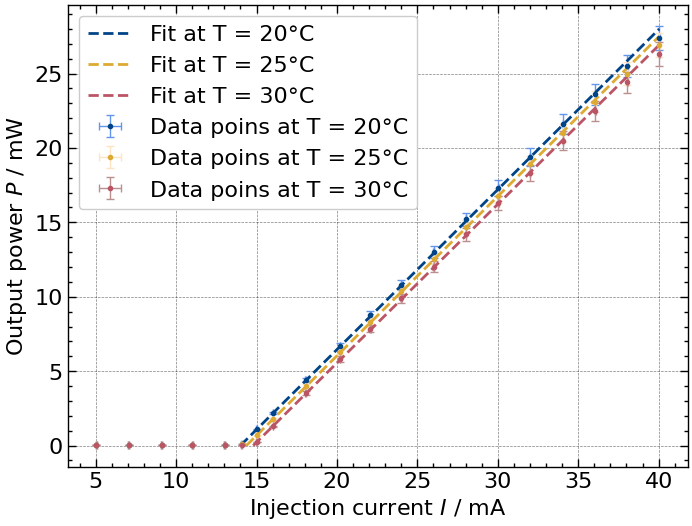

In [40]:
# final plot
#data
plt.errorbar(current, power_T20, yerr=power_T20*0.03, xerr=0.02, fmt='.', ecolor='cornflowerblue', elinewidth=1, capsize=3, label="Data poins at T = 20°C")
plt.errorbar(current, power_T25, yerr=power_T25*0.03, xerr=0.02, fmt='.', ecolor='bisque', elinewidth=1, capsize=3, label="Data poins at T = 25°C")
plt.errorbar(current, power_T30, yerr=power_T30*0.03, xerr=0.02, fmt='.', ecolor='rosybrown', elinewidth=1, capsize=3, label="Data poins at T = 30°C")

#fits
current_fit_20 = np.arange(-d_20/eta_20, current.max(), 0.001)
current_fit_25 = np.arange(-d_25/eta_25, current.max(), 0.001)
current_fit_30 = np.arange(-d_30/eta_30, current.max(), 0.001)
plt.plot(current_fit_20, power_function(current_fit_20, eta_20, d_20), '--', label="Fit at T = 20°C")
plt.plot(current_fit_25, power_function(current_fit_25, eta_25, d_25), '--', label="Fit at T = 25°C")
plt.plot(current_fit_30, power_function(current_fit_30, eta_30, d_30), '--', label="Fit at T = 30°C")

plt.xlabel("Injection current $I$ / mA")
plt.ylabel("Output power $P$ / mW")
plt.legend()
#plt.savefig("plots/output_power.png", dpi=400)
plt.show()

## 4.2 Measurement of the frequency characteristic

In [41]:
# for csv file analysis:
# files starting with I30 are from varying the temperature at current of 30mA
# files starting differently, but ending with 20 or 25 are from varying the current at temp 20 or 25 respectively
# files with no underscore have the same order, where the third number from the left is 
# the first decimal point of temperature or current

# one piezo current ascend is 20 ms
# calibrate distance with external cavity fsr and peak distance

In [42]:
# find maxima
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

def convert_t_f(time_list, ref_t, ref_fsr):

    return [(time_list[i])*ref_fsr/ref_t for i in range(len(time_list))]


# find the two largest peaks with wide enough distance to be resonancy peaks
def get_peaks(filepaths):
    peak_list = []
    peak_list_hopped = []

    for file in filepaths:
        # read data
        raw = pd.read_csv(file, skiprows=0, delimiter=",", header=[0])
        # find potential maxima
        peaks = sp.signal.find_peaks(raw["CH2[V]"], distance=2000)[0]
        # remove smallest until only 2 largest remaining
        while len(peaks) > 2:
            peakheights = [raw["CH2[V]"][p] for p in peaks]
            smallest = np.argmin(peakheights)
            peaks = np.delete(peaks, smallest, axis=0)
        #extract values
        peak_data = [[raw["[s]"][p] for p in peaks], [raw["CH2[V]"][p] for p in peaks]]

        # correct hopping due to periodicity
        peak_data_hopped = peak_data.copy()
        if len(peak_list)>1:
            previous_peak = peak_list[-1]
            previous_peak_hopped = peak_list_hopped[-1]

            c1 = abs(peak_data[0][0] - previous_peak[0][0]) >= 0.005
            c2 = abs(peak_data_hopped[0][0] - previous_peak_hopped[0][0]) >= 0.005

            if c1 or c2:
                peak_data_1 = peak_data[0][0]
                peak_data_0 = peak_data[0][0] - abs(peak_data[0][0]-peak_data[0][1])
                peak_data_hopped[0] = [peak_data_0, peak_data_1]

        # append to list
        peak_list.append(peak_data)
        peak_list_hopped.append(peak_data_hopped)

    # convert time to frequency shift relative to first measurement
    # average peak distances to calibrate with fsr
    peak_dist_avg = np.average([np.abs(entry[0][0] - entry[0][1]) for entry in peak_list_hopped])
    print("peak_dist_avg", peak_dist_avg)
    reference = peak_list_hopped[0]
    peak_list_hopped = [[convert_t_f([entry[0][0]-reference[0][0], entry[0][1]-reference[0][1]], 
                              peak_dist_avg, 630), entry[1]] for entry in peak_list_hopped]
    
    
    return(peak_list_hopped)

# get relative filepaths
files = os.listdir("raw_csv_files")

#### Frequency with current change

peak_dist_avg 0.009744


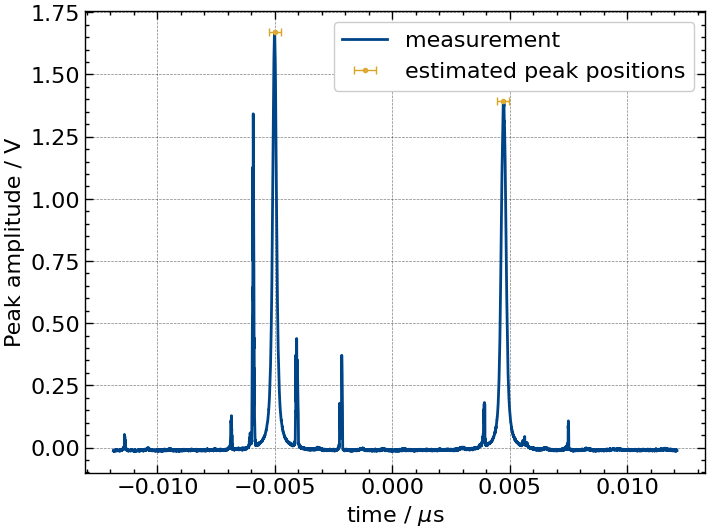

In [43]:
n=3
current_change_files = [str("raw_csv_files/"+item) for item in files if item.endswith('20.CSV') and not item.startswith('I30')]

current_peaks = get_peaks([current_change_files[n]])


raw = pd.read_csv(current_change_files[n], skiprows=0, delimiter=",", header=[0])
plt.plot(raw["[s]"], raw["CH2[V]"], label = "measurement")
plt.errorbar([-0.005, 0.0047], current_peaks[0][1], xerr=0.00025, 
             ecolor = "goldenrod", fmt=".", elinewidth=1, capsize=3, label = "estimated peak positions")
plt.xlabel(r"time / $\mu$s")
plt.ylabel(r"Peak amplitude / V")
plt.legend()

peak_dist_avg 0.009883764705882354


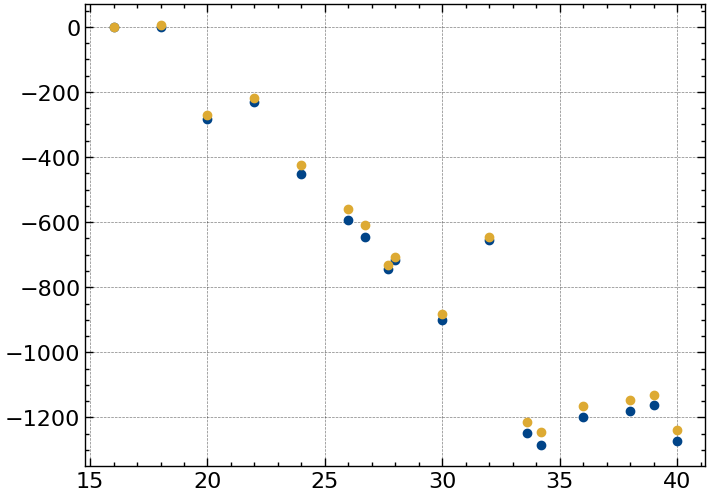

In [44]:
## analysis for current
current_change_files = [str("raw_csv_files/"+item) for item in files if item.endswith('20.CSV') and not item.startswith(r'I30\d')]

current_peaks = get_peaks(current_change_files)
current_peakdiff = [peak[0][0] for peak in current_peaks]
#print(current_peakdiff[0])

# extract current values from file name
current_values = []
pattern = r'I(\d+(\.\d+)?)_?20\.CSV'
for filepath in current_change_files:
    match = re.search(pattern, filepath)

    digits = match.group(1)

    if '_20' not in filepath:
        digits = str(digits[:-1] + '.' + digits[-1])

    current_values.append(float(digits))

plt.scatter(current_values, current_peakdiff)

current_peakdiff = [peak[0][1] for peak in current_peaks]
plt.scatter(current_values, current_peakdiff)

Fit results for choice  0
a =  1.4022996707165867 \pm 7.967611980183556 GHz/mA
b =  -22.436794729947543 \pm 135.6835430650531 GHz
Fit results for choice  1
a =  26.070025709597306 \pm 7.967612153475857 GHz/mA
b =  -798.9283673548915 \pm 167.50945178138335 GHz
Fit results for choice  2
a =  -35.424416401153856 \pm 1.7509269662836147 GHz/mA
b =  321.7555115306275 \pm 48.811893318606245 GHz
Fit results for choice  3
a =  6.979409312086407 \pm 1.927899170650949 GHz/mA
b =  -1464.4984903616182 \pm 71.0956648304466 GHz


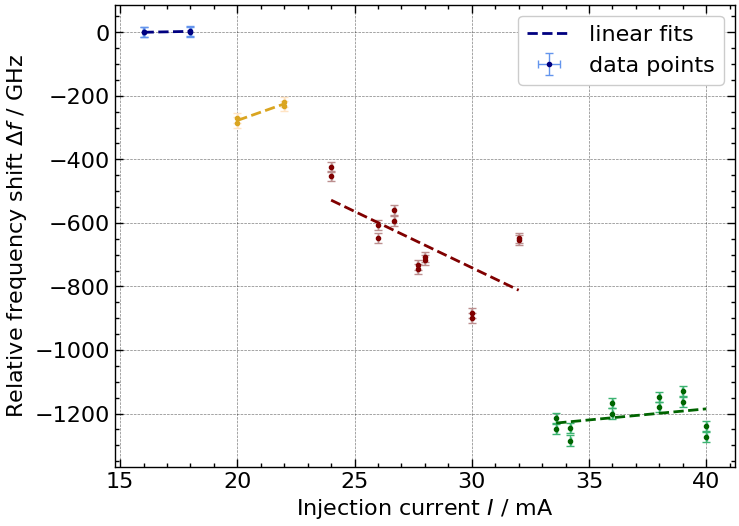

In [45]:
# define frequency error
raw = pd.read_csv(current_change_files[0], skiprows=0, delimiter=",", header=[0])
p_dist_avg = 0.009883764705882354
freqerror = convert_t_f([0.00025], p_dist_avg, 630)[0] # GHz
current_error = 0.02 # mA
# define lists of points per fit
fit_choices = [[0,1], [2,3], [4,5,6,7,8,9,10], [11,12,13,14,15,16]]
colors = ["navy", "goldenrod", "maroon", "darkgreen"]
ecolors = ['cornflowerblue', 'bisque', 'rosybrown', 'mediumseagreen']

def lin_fit(x, a, b):
    return(a*x + b)

for iteration, indexlist in enumerate(fit_choices): # fits per chosen area
    x_data = [current_values[i] for i in indexlist]
    y_datas = [current_peaks[i][0] for i in indexlist]

    # combine measurements of both peaks
    x_data.extend(x_data)
    x_data.sort()
    y_data = y_datas[0].copy()
    y_datas = np.array(y_datas.copy())
    y_data = [value for entry in y_datas for value in entry]

    # perform fit
    popt, pcov = sp.optimize.curve_fit(lin_fit, x_data, y_data, sigma=freqerror, absolute_sigma=True)
    print("Fit results for choice ", iteration)
    print('a = ', popt[0], "\pm", np.sqrt(pcov[0][0]), "GHz/mA")
    print('b = ', popt[1], "\pm", np.sqrt(pcov[1][1]), "GHz")

    # final plot
    #data
    d_label = "data points" if iteration==0 else None
    plt.errorbar(x_data, y_data, yerr=freqerror, xerr=current_error, fmt=".",
                    color = colors[iteration], ecolor=ecolors[iteration], elinewidth=1, capsize=3, label=d_label)
    #fit
    f_label = "linear fits" if iteration==0 else None
    fit_range = np.arange(np.min(x_data), np.max(x_data), 0.001)
    plt.plot(fit_range, lin_fit(fit_range, popt[0], popt[1]), color=colors[iteration], linestyle='--', label=f_label,)

plt.xlabel("Injection current $I$ / mA")
plt.ylabel("Relative frequency shift $\Delta f$ / GHz")
plt.legend()
plt.show()

In [46]:
## compute average frequency tunability with fit of all the data

x_data = current_values.copy()
y_datas = [current_peaks[i][0] for i in range(len(x_data))]

# combine measurements of both peaks
x_data.extend(x_data)
x_data.sort()
y_data = y_datas[0].copy()
y_datas = np.array(y_datas.copy())
y_data = [value for entry in y_datas for value in entry]

# perform fit
popt, pcov = sp.optimize.curve_fit(lin_fit, x_data, y_data, sigma=freqerror, absolute_sigma=True)
print("Fit results for all the data ")
print('a = ', popt[0], "\pm", np.sqrt(pcov[0][0]), "GHz/mA")
print('b = ', popt[1], "\pm", np.sqrt(pcov[1][1]), "GHz")


Fit results for all the data 
a =  -56.624960634750046 \pm 0.38180070734530736 GHz/mA
b =  907.877310675645 \pm 11.365256713649163 GHz


#### Frequency with temperature change

In [47]:
#n=0
#current_peaks = get_peaks([temperature_change_files[n]])

#raw = pd.read_csv(temperature_change_files[n], skiprows=0, delimiter=",", header=[0])
#plt.plot(raw["[s]"], raw["CH2[V]"])
#plt.scatter(current_peaks[0][0], current_peaks[0][1], color = "orange")
#print(n)
#n += 1

peak_dist_avg 0.009789799999999998


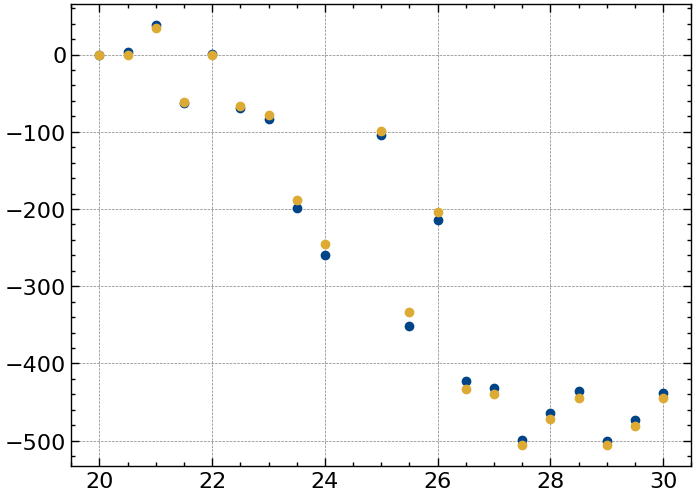

In [48]:
## analysis for temperature
# get right order of .csv files
file_endings = ["_20","205","_21","215","_22","225","_23","235","_24","_25","255","_26","265","_27","275","_28","285","_29","295","_30"]
temperature_change_files = [str("raw_csv_files/I30"+ending+".CSV") for ending in file_endings]

temperature_peaks = get_peaks(temperature_change_files)
temperature_peakdiff = [peak[0][0] for peak in temperature_peaks]

# extract temperature values from file name
temperature_values = []
pattern = r'I30_?(\d+(\.\d+)?)\.CSV'
for filepath in temperature_change_files:
    match = re.search(pattern, filepath)

    digits = match.group(1)

    if '30_' not in filepath:
        digits = str(digits[:-1] + '.' + digits[-1])

    temperature_values.append(float(digits))

plt.scatter(temperature_values, temperature_peakdiff)

temperature_peakdiff = [peak[0][1] for peak in temperature_peaks]
plt.scatter(temperature_values, temperature_peakdiff)


Fit results for choice  0
a =  36.037508425346026 +/- 16.088188051417138 GHz/K
b =  -10569.97282832752 +/- 4724.301026596121 GHz
Fit results for choice  1
a =  -24.94306733560673 +/- 10.175049677442754 GHz/K
b =  7315.380705865571 +/- 3005.7150657262578 GHz
Fit results for choice  2
a =  -13.301561748133613 +/- 5.486026325227056 GHz/K
b =  3743.3200392960434 +/- 1634.56946221961 GHz
Fit results for choice  3
a =  -6.637516016178847 +/- 3.5107269834717987 GHz/K
b =  1538.4949871130568 +/- 1058.1407627018125 GHz


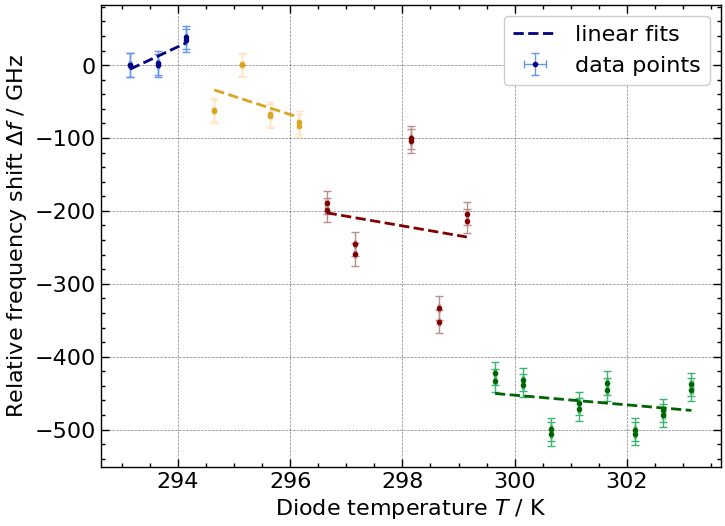

In [49]:
# define frequency error
raw = pd.read_csv(current_change_files[0], skiprows=0, delimiter=",", header=[0])
p_dist_avg = 0.009789799999999998
freqerror = convert_t_f([0.00025], p_dist_avg, 630)[0] # GHz
temperature_error = 0.5 # K
# define lists of points per fit
fit_choices = [[0,1,2], [3,4,5,6], [7,8,9,10,11], [12,13,14,15,16,17,18,19]]
colors = ["navy", "goldenrod", "maroon", "darkgreen"]
ecolors = ['cornflowerblue', 'bisque', 'rosybrown', 'mediumseagreen']

def lin_fit(x, a, b):
    return(a*x + b)

for iteration, indexlist in enumerate(fit_choices): # fits per chosen area
    x_data = [temperature_values[i]+273.15 for i in indexlist]
    y_datas = [temperature_peaks[i][0] for i in indexlist]

    # combine measurements of both peaks
    x_data.extend(x_data)
    x_data.sort()
    y_data = y_datas[0].copy()
    y_datas = np.array(y_datas.copy())
    y_data = [value for entry in y_datas for value in entry]

    # perform fit
    popt, pcov = sp.optimize.curve_fit(lin_fit, x_data, y_data, sigma=freqerror, absolute_sigma=True)
    print("Fit results for choice ", iteration)
    print('a = ', popt[0], "+/-", np.sqrt(pcov[0][0]), "GHz/K")
    print('b = ', popt[1], "+/-", np.sqrt(pcov[1][1]), "GHz")

    # final plot
    #data
    d_label = "data points" if iteration==0 else None
    plt.errorbar(x_data, y_data, yerr=freqerror, xerr=current_error, fmt=".",
                    color = colors[iteration], ecolor=ecolors[iteration], elinewidth=1, capsize=3, label=d_label)
    #fit
    f_label = "linear fits" if iteration==0 else None
    fit_range = np.arange(np.min(x_data), np.max(x_data), 0.001)
    plt.plot(fit_range, lin_fit(fit_range, popt[0], popt[1]), color=colors[iteration], linestyle='--', label=f_label,)

plt.xlabel("Diode temperature $T$ / K")
plt.ylabel("Relative frequency shift $\Delta f$ / GHz")
plt.legend()
plt.show()

In [52]:
## compute average frequency tunability with fit of all the data

x_data = [temperature_values[i]+273.15 for i in range(len(temperature_values))]
y_datas = [temperature_peaks[i][0] for i in range(len(x_data))]

# combine measurements of both peaks
x_data.extend(x_data)
x_data.sort()
y_data = y_datas[0].copy()
y_datas = np.array(y_datas.copy())
y_data = [value for entry in y_datas for value in entry]

# perform fit
popt, pcov = sp.optimize.curve_fit(lin_fit, x_data, y_data, sigma=freqerror, absolute_sigma=True)
print("Fit results for all the data ")
print('a = ', popt[0], "+/-", np.sqrt(pcov[0][0]), "GHz/K")
print('b = ', popt[1], "+/-", np.sqrt(pcov[1][1]), "GHz")

Fit results for all the data 
a =  -59.2830961104776 +/- 0.8204889133021114 GHz/K
b =  17428.25212686281 +/- 244.66250606744882 GHz
